In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
restaurant = pd.read_csv('/Users/julie.le-bousse/Downloads/tripadvisor_european_restaurants.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [4]:
columns = ['country', 'region', 'price_level','vegetarian_friendly', 'vegan_options', 'gluten_free', 'open_days_per_week', 'cuisines', 'features', 'avg_rating']


In [5]:
# Création d'un dataset avec uniquement les colonnes nécessaires

restaurant = restaurant.loc[:, columns]

In [6]:
restaurant.head()

,country,region,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,cuisines,features,avg_rating
0,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.0
1,France,Nouvelle-Aquitaine,€,N,N,N,NaN,NaN,NaN,4.0
2,France,Centre-Val de Loire,€,N,N,N,NaN,"French, European","Reservations, Seating, Table Service, Wheelcha...",5.0
3,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Serves Alcohol, Table S...",4.0
4,France,Occitanie,€€-€€€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.5


In [7]:
# Filtre pour avoir uniquement les données France

restaurant = restaurant.loc[restaurant.country == 'France']

In [8]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155288 entries, 0 to 155287
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              155288 non-null  object 
 1   region               155286 non-null  object 
 2   price_level          125483 non-null  object 
 3   vegetarian_friendly  155288 non-null  object 
 4   vegan_options        155288 non-null  object 
 5   gluten_free          155288 non-null  object 
 6   open_days_per_week   85446 non-null   float64
 7   cuisines             132871 non-null  object 
 8   features             61372 non-null   object 
 9   avg_rating           144475 non-null  float64
dtypes: float64(2), object(8)
memory usage: 13.0+ MB


In [9]:
# Clean la colonne features pour créer une colonne reservation avec des boolean

restaurant["reservation"] = np.where(restaurant.features.str.contains('Reservations') == True, 1, 0)


In [10]:
# Clean la colonne cuisines pour créer des colonnes par origine de recettes avec des boolean

restaurant["cuisine_fr"] = np.where(restaurant.cuisines.str.contains('French') == True, 1, 0)
restaurant["cuisine_it"] = np.where(restaurant.cuisines.str.contains('Italian') == True, 1, 0)
restaurant["cuisine_ch"] = np.where(restaurant.cuisines.str.contains('Chinese') == True, 1, 0)
restaurant["cuisine_ff"] = np.where(restaurant.cuisines.str.contains('Fast food') == True, 1, 0)
restaurant["cuisine_jp"] = np.where(restaurant.cuisines.str.contains('Japanese') == True, 1, 0)


In [11]:
# Modification des colonnes vegetarian_friendly, vegan_options, gluten_free pour passer en boolen 0/1 pour calcul des coefficients de corrélation

restaurant['vegetarian'] = np.where(restaurant.vegetarian_friendly == 'N', 0, 1)
restaurant['vegan'] = np.where(restaurant.vegan_options == 'N', 0, 1)
restaurant['gluten'] = np.where(restaurant.gluten_free == 'N', 0, 1)


In [12]:
restaurant = pd.concat([restaurant, pd.get_dummies(restaurant.price_level)], axis=1)

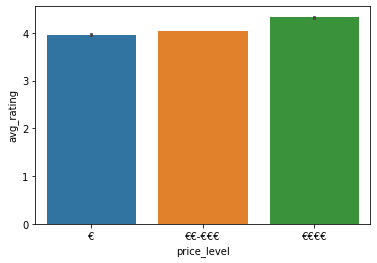

In [13]:
sns.barplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating')


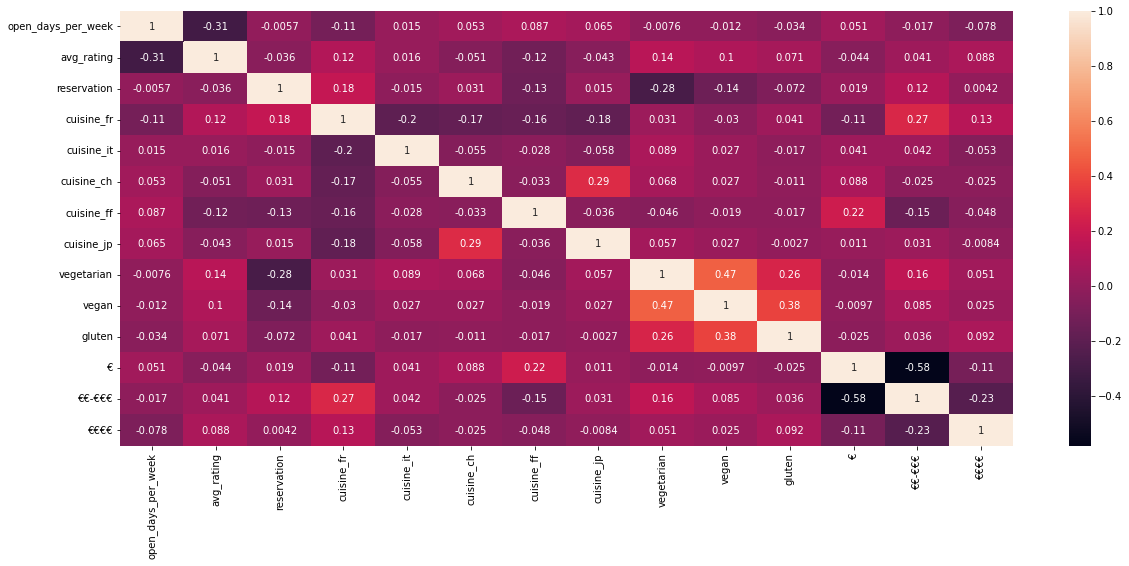

In [15]:
plt.figure(figsize = (20,8)) #annot= annotation 
sns.heatmap(restaurant.corr(), annot = True)

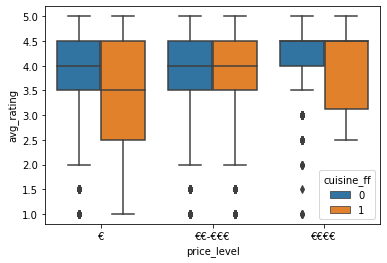

In [16]:

sns.boxplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating',
           hue = 'cuisine_ff')


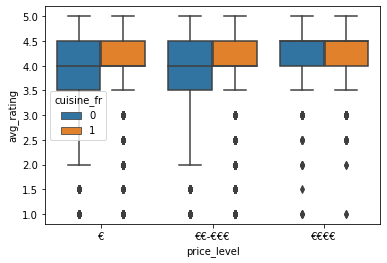

In [17]:
sns.boxplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating',
           hue = 'cuisine_fr')

In [18]:
# check des restaurants qui ont plusieurs typologies de cuisines

restaurant_2 = restaurant.loc[(restaurant.cuisine_fr + restaurant.cuisine_ff + restaurant.cuisine_jp + restaurant.cuisine_ch + restaurant.cuisine_it) > 1]




In [19]:
restaurant_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8356 entries, 11 to 155283
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              8356 non-null   object 
 1   region               8356 non-null   object 
 2   price_level          7609 non-null   object 
 3   vegetarian_friendly  8356 non-null   object 
 4   vegan_options        8356 non-null   object 
 5   gluten_free          8356 non-null   object 
 6   open_days_per_week   5367 non-null   float64
 7   cuisines             8356 non-null   object 
 8   features             2733 non-null   object 
 9   avg_rating           7909 non-null   float64
 10  reservation          8356 non-null   int64  
 11  cuisine_fr           8356 non-null   int64  
 12  cuisine_it           8356 non-null   int64  
 13  cuisine_ch           8356 non-null   int64  
 14  cuisine_ff           8356 non-null   int64  
 15  cuisine_jp           8356 non-null 

In [20]:
# filtre les restaurants qui ont plusieurs typologies de cuisine: on retire restaurant 2 à restaurant et les NaN

restaurant_3 = restaurant.loc[(restaurant.cuisine_fr + restaurant.cuisine_ff + restaurant.cuisine_jp + restaurant.cuisine_ch + restaurant.cuisine_it) == 1]


In [50]:
rest_cuisine = restaurant_3.melt(id_vars = 'avg_rating',
                                value_vars = ['cuisine_fr', 'cuisine_jp', 'cuisine_it', 'cuisine_ff', 'cuisine_ch'],
                                var_name = 'type_cuisine',
                                value_name = 'value')

In [51]:
rest_cuisine = rest_cuisine.loc[rest_cuisine.value != 0]

In [52]:
rest_cuisine

,avg_rating,type_cuisine,value
0,4.0,cuisine_fr,1
1,5.0,cuisine_fr,1
2,4.0,cuisine_fr,1
3,4.5,cuisine_fr,1
4,4.5,cuisine_fr,1
...,...,...,...
510492,4.0,cuisine_ch,1
510506,3.5,cuisine_ch,1
510547,4.0,cuisine_ch,1
510760,3.0,cuisine_ch,1


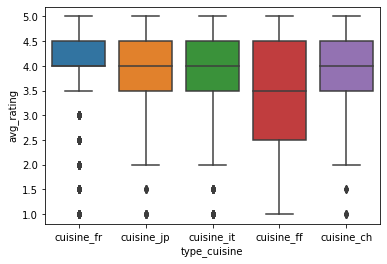

In [53]:
sns.boxplot(data=rest_cuisine, 
            x = 'type_cuisine',
            y = 'avg_rating')

<ipython-input-56-e461b1db385a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rest_regime = restaurant.groupby(by= ['avg_rating'])['vegetarian', 'vegan', 'gluten'].mean()


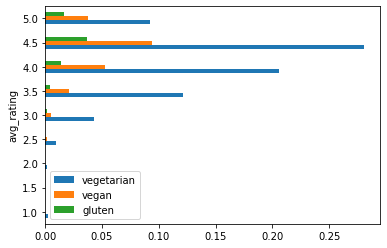

In [56]:
rest_regime = restaurant.groupby(by= ['avg_rating'])['vegetarian', 'vegan', 'gluten'].mean()
rest_regime.plot.barh()

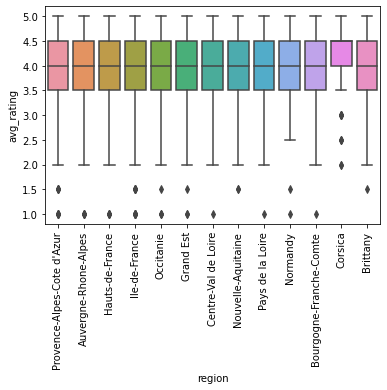

In [28]:
plt.xticks(rotation=90)
sns.boxplot(data=restaurant_2, 
            x = 'region',
            y = 'avg_rating')

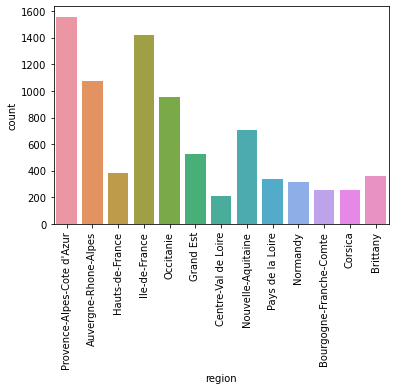

In [45]:
plt.xticks(rotation=90)
sns.countplot(data=restaurant_2,
             x='region')

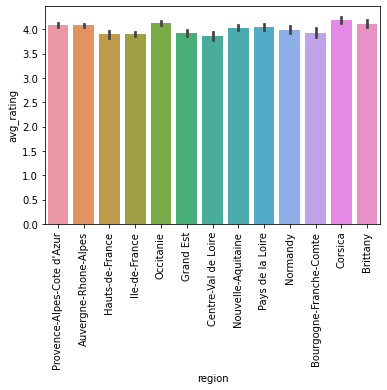

In [49]:
plt.xticks(rotation=90)
sns.barplot(data=restaurant_2, 
            x = 'region',
            y = 'avg_rating')